<a href="https://colab.research.google.com/github/harrymkwn/InfluenceAnalysis/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import re
import string
from scipy import spatial
from sklearn.utils import shuffle 
from sklearn.model_selection import KFold

In [2]:
from google.colab import  drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Import

In [3]:
df_train = pd.read_csv('/content/drive/My Drive/InfluenceAnalysis/Data/Train/clean_all_train.csv')
df_train = df_train
df_train.head()

,Unnamed: 0,Tweets,Labels,Category
0,0,How the fuck Who the heck moved my fridge ...,0.938,anger
1,1,So my Indian Uber driver just called someone t...,0.896,anger
2,2,UK I asked for my parcel to be delivered to a...,0.896,anger
3,3,so ef whichever butt wipe pulled the fire alar...,0.896,anger
4,4,do not join they put the phone down on you ta...,0.896,anger


In [4]:
def find_length(tweet):

  return len(tweet.split())

In [5]:
def remove_numbers(tweet):
  tweet = re.sub('[0-9]+','',tweet)
  return tweet

In [6]:
hash={"anger":[1,0,0,0],"sadness":[0,1,0,0],"joy":[0,0,1,0],"fear":[0,0,0,1]}
def number_category(category):
  return hash[category]

In [7]:
df_train['Encoding'] = df_train['Category'].apply(lambda category : number_category(category))
df_train['Length'] = df_train['Tweets'].apply(lambda tweet : find_length(tweet))
df_train['Tweets'] = df_train['Tweets'].apply(lambda tweet : remove_numbers(tweet))

maxLengthOfTweet = df_train['Length'].max()


#shuffal data

In [8]:
def shuffle_efficiently(df_train):
  df_train = shuffle(df_train)
  df_train = shuffle(df_train)
  df_train = shuffle(df_train)
  df_train = shuffle(df_train)
  df_train = shuffle(df_train)
  df_train = shuffle(df_train)
  df_train = shuffle(df_train)
  df_train = shuffle(df_train)
  df_train = shuffle(df_train)
  df_train = shuffle(df_train)
  df_train = shuffle(df_train)
  df_train.reset_index(drop=True, inplace=True)

  df_train.head(1000)

  return df_train

In [9]:
df_train = shuffle_efficiently(df_train)

df_train.head()

,Unnamed: 0,Tweets,Labels,Category,Encoding,Length
0,2191,Watch this amazing live ly broadcast by brid...,0.655,joy,"[0, 0, 1, 0]",9
1,1835,induction day tomorrow for pizza express,0.275,fear,"[0, 0, 0, 1]",6
2,2179,There is something v satisfying about opening...,0.667,joy,"[0, 0, 1, 0]",26
3,1129,ntfc mourinho is worried bringing Ibra and R...,0.646,fear,"[0, 0, 0, 1]",10
4,2948,Another grim and compelling news report by on...,0.708,sadness,"[0, 1, 0, 0]",19


#using glove word embadding

In [10]:
embeddings_dict = {}
with open("/content/drive/My Drive/InfluenceAnalysis/glove/glove.twitter.27B.25d.txt", 'r', encoding="utf-8") as f:
  for line in f:
      values = line.split()
      word = values[0]
      vector = np.asarray(values[1:], "float32")
      embeddings_dict[word] = vector

In [11]:
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))


#Preprocess Data

In [12]:
def tockanizer(tweet):
  tweet = df_train['Tweets'][ind].split()
  return tweet,len(tweet)

In [13]:
tweetslist = []
for ind in df_train.index:
  tweet,length = tockanizer(df_train['Tweets'][ind])
  tweet.extend('x'*(maxLengthOfTweet - length))
  tweetslist.append(tweet)



print(tweetslist)


[['Watch', 'this', 'amazing', 'live', 'ly', 'broadcast', 'by', 'bridges', 'musically', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'], ['induction', 'day', 'tomorrow', 'for', 'pizza', 'express', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x'], ['There', 'is', 'something', 'v', 'satisfying', 'about', 'opening', 'an', 'old', 'to', 'do', 'doc', 'file', 'and', 'being', 'able', 'to', 'check', 'off', 'all', 'the', 'things', 'you', 'have', 'done', 'smiling', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x',

In [14]:
tweetseq= [];

for tweet in tweetslist:
  temp = []
  for word in tweet:
    if word != "x" and isinstance(word , str):
      try:
        temp.append(embeddings_dict[word.lower()])
      except KeyError:
        temp.append([0]*25)
    else:
      temp.append([0]*25)
    
  tweetseq.append(temp)

In [15]:
tweetseq[0]

[array([ 0.27806 ,  0.42837 ,  0.38726 , -0.8294  , -0.75826 , -0.44426 ,
         1.7621  ,  0.11907 ,  0.16156 , -0.72022 , -0.47905 ,  0.67888 ,
        -4.578   , -0.17566 ,  0.073636,  0.24484 ,  0.36114 , -0.38957 ,
        -0.43863 , -0.094151, -0.52517 , -0.044816,  0.78118 , -0.7121  ,
         0.47927 ], dtype=float32),
 array([-0.17895 ,  0.38406 ,  0.073035, -0.32363 , -0.092441, -0.40767 ,
         2.1     , -0.11363 , -0.58784 , -0.17034 , -0.6433  ,  0.72388 ,
        -5.7839  , -0.10406 ,  0.52152 , -0.11314 ,  0.59554 , -0.47587 ,
        -0.4551  ,  0.084431, -0.4582  , -0.16727 ,  0.54594 ,  0.035478,
        -0.16073 ], dtype=float32),
 array([-0.88106 , -0.28564 ,  0.10656 , -0.66897 ,  0.20382 ,  0.19323 ,
         2.3695  ,  0.17671 , -1.0583  , -0.9489  ,  0.16003 ,  0.74457 ,
        -4.2671  ,  0.012796, -0.059402, -0.025333,  0.40791 , -0.52264 ,
        -0.33542 ,  0.42602 , -0.94333 , -0.20852 , -0.95114 ,  0.21007 ,
        -0.080704], dtype=float32),
 arr

In [16]:
training_padded = np.array(tweetseq)
labels = list(df_train['Encoding'])
training_labels = np.array(labels)
# testing_padded = np.array(testing_padded)
# testing_labels = np.array(testing_labels)
print(training_padded.shape)

(3613, 63, 25)


In [17]:
tens=tf.Variable(tweetseq[:10])
print(tens)

<tf.Variable 'Variable:0' shape=(10, 63, 25) dtype=float32, numpy=
array([[[ 0.27806 ,  0.42837 ,  0.38726 , ...,  0.78118 , -0.7121  ,
          0.47927 ],
        [-0.17895 ,  0.38406 ,  0.073035, ...,  0.54594 ,  0.035478,
         -0.16073 ],
        [-0.88106 , -0.28564 ,  0.10656 , ..., -0.95114 ,  0.21007 ,
         -0.080704],
        ...,
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ]],

       [[-1.0676  ,  0.72546 ,  0.034001, ...,  0.19574 ,  0.32489 ,
          0.12461 ],
        [-0.95101 ,  0.5056  ,  0.36139 , ..., -0.26051 ,  0.75546 ,
          0.42688 ],
        [-0.72888 ,  0.67018 ,  0.59031 , ...,  0.5125  ,  0.88524 ,
          0.73395 ],
        ...,
        [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
          0.      ],
     

In [18]:
labels = list(df_train['Encoding'])
labels=tf.convert_to_tensor(labels[:10])
print(labels)

tf.Tensor(
[[0 0 1 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 1]], shape=(10, 4), dtype=int32)


#Classification Model

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(63,25)))
model.add(tf.keras.layers.LSTM(10))
# model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                1440      
_________________________________________________________________
dense (Dense)                (None, 4)                 44        
Total params: 1,484
Trainable params: 1,484
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(training_padded,training_labels,epochs=100)

Epoch 1/100
113/113 [==============================] - 3s 24ms/step - loss: 1.3786 - accuracy: 0.3153
Epoch 2/100
113/113 [==============================] - 3s 24ms/step - loss: 1.3751 - accuracy: 0.3177
Epoch 3/100
113/113 [==============================] - 3s 24ms/step - loss: 1.3746 - accuracy: 0.3177
Epoch 4/100
113/113 [==============================] - 3s 25ms/step - loss: 1.3749 - accuracy: 0.3177
Epoch 5/100
113/113 [==============================] - 3s 25ms/step - loss: 1.3747 - accuracy: 0.3177
Epoch 6/100
113/113 [==============================] - 3s 24ms/step - loss: 1.3739 - accuracy: 0.3177
Epoch 7/100
113/113 [==============================] - 3s 24ms/step - loss: 1.3490 - accuracy: 0.3537
Epoch 8/100
113/113 [==============================] - 3s 26ms/step - loss: 1.3101 - accuracy: 0.3905
Epoch 9/100
113/113 [==============================] - 3s 25ms/step - loss: 1.2891 - accuracy: 0.4008
Epoch 10/100
113/113 [==============================] - 3s 26ms/step - loss: 1.272

In [ ]:
abc  = model.predict()

       loss  accuracy
0  1.378591  0.315250
1  1.375067  0.317741
2  1.374570  0.317741
3  1.374881  0.317741
4  1.374723  0.317741


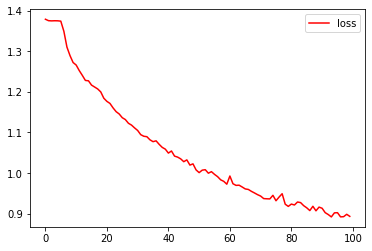

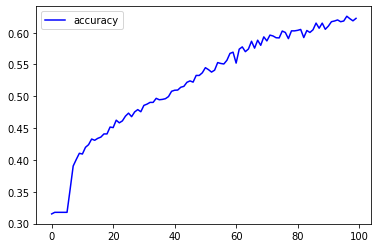

In [22]:
hist = pd.DataFrame(history.history)
print(hist.head())
plt.figure()
plt.plot(hist['loss'],c='r')
plt.legend(['loss'])
plt.show()
plt.plot(hist['accuracy'],c='b')
plt.legend(['accuracy'])
plt.show()

#Word2VecCBOW


In [23]:
dict_cbow = pd.read_csv('/content/drive/My Drive/InfluenceAnalysis/Word2VecCBOW/Dictionary.csv')
new_columns = dict_cbow.columns.values
new_columns[0] = 'Month'
dict_cbow.columns = new_columns
dict_cbow = dict_cbow.set_index('Month')
dict_cbow.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
How,0.054010,-0.116635,-0.615176,0.053264,0.270385,-0.034695,0.660015,0.435280,-0.167341,0.072743,-0.081690,-0.199493,0.041174,0.343824,0.363869,-0.056462,0.333451,-0.031356,-0.219526,0.017895,0.192430,0.360702,0.250293,0.447572,-0.409847,0.362227,-0.055411,0.018955,-0.317367,-0.007409,0.145666,-0.009043,-0.041776,0.302149,0.602522,-0.472846,0.086138,0.475878,-0.056626,-0.303826,...,0.593062,-0.235644,-0.358872,0.059637,0.143638,-0.284239,0.377261,0.162162,0.523762,-0.398577,0.280657,0.533163,-0.161320,0.406426,-0.115575,-0.182342,-0.224664,0.173816,-0.139930,-0.542530,0.435035,-0.371732,0.284868,0.788156,-0.105276,0.208798,0.036610,0.869398,-0.072490,0.438198,-0.095018,0.083041,0.114968,0.319551,0.164187,0.009881,-0.315001,0.081630,-0.110300,-0.092392
the,-0.852750,0.432507,-0.289424,0.795800,0.023257,0.050553,-0.830053,-0.742640,-0.421492,0.356275,-0.170520,0.668634,-0.030951,0.300104,0.861248,0.583642,0.428347,0.120406,0.106232,0.625573,1.054794,0.543136,0.728656,0.110497,-0.630705,-0.065428,-0.368490,-0.886051,-0.680582,0.173473,0.158773,0.402065,-0.398248,-0.212494,0.249046,-0.135494,1.107102,0.753997,0.078687,0.289999,...,0.708970,-1.197734,-0.103120,-0.890021,-0.476998,0.471254,-0.151074,0.949742,0.493666,0.069152,0.603835,0.461832,-0.410488,-0.247846,0.159008,-0.021451,-0.259697,0.255975,-0.038003,-0.400884,-0.106482,0.134460,-0.114582,0.085091,0.074969,-0.807609,-0.890234,-0.814566,-0.042241,-0.848224,-0.292800,0.834626,-0.036491,0.225063,0.557594,-0.570594,0.167689,0.379619,-0.497976,0.392273
fuck,0.167770,0.119974,0.302141,-0.200799,-0.266057,-0.301892,0.327918,0.003196,0.631058,0.265193,-0.137870,0.084515,0.252873,0.114272,-0.339069,-0.215894,0.175621,0.142763,-0.258152,0.352802,-0.115566,0.008143,0.032092,0.359854,0.236001,-0.119994,-0.050785,0.277579,0.345362,0.277167,-0.202077,0.301460,0.385830,-0.000850,-0.164581,0.036501,-0.155205,-0.110175,-0.177312,-0.300878,...,0.198516,0.242411,0.014289,0.190846,-0.261074,-0.387869,0.561773,-0.258857,-0.396569,-0.498835,-0.031231,-0.339743,0.739089,0.276680,0.319858,-0.314116,-0.156372,0.113372,-0.133390,0.106388,0.309260,-0.069228,0.124728,0.039303,0.127196,0.034494,0.119910,0.065314,0.143028,0.125673,-0.120518,0.184570,0.115688,-0.376349,0.056164,-0.178325,-0.185697,0.060345,0.015507,0.100795
Who,-0.325103,-0.196605,-0.298863,0.149170,0.163655,-0.087753,-0.213542,0.291837,0.164022,-0.116587,-0.542942,0.247486,0.216051,0.229936,0.350848,-0.045564,-0.269089,-0.438484,0.234107,-0.018791,-0.182762,-0.040871,0.086698,-0.042436,-0.173498,0.061358,0.282062,-0.279571,0.259520,0.427197,0.396517,0.254424,0.165994,0.384576,0.001214,-0.237645,0.194899,0.131192,-0.271535,0.312612,...,-0.101488,0.134374,0.092284,0.318618,-0.403911,-0.438786,0.164501,-0.296264,-0.047216,0.052797,0.225831,0.183170,0.146559,-0.707248,0.749275,-0.431474,-0.279717,0.291325,0.107159,-0.226957,-0.515657,0.276505,0.465150,-0.442732,-0.185686,0.097060,-0.655621,0.246724,0.271543,0.208196,-0.116989,-0.197150,-0.225224,0.185783,0.099388,0.755426,-0.080447,0.143895,-0.020569,0.288599
heck,-0.310433,-0.150483,-0.100078,0.142485,-0.116532,-0.477134,-0.096097,-0.026066,-0.424769,0.585560,-0.550719,-0.189389,0.392410,0.529350,-0.099750,-0.644823,-0.513343,-0.095281,-0.238755,-0.510876,0.672031,0.622922,-0.179614,0.036672,0.037292,0.425749,0.870473,0.566797,0.636458,0.484237,-0.403266,0.132335,0.241753,0.331775,-0.010263,0.228108,-0.179902,-0.232239,-0.223587,0.693765,...,-0.009714,0.384201,-0.249755,0.136071,0.558143,-0.222694,0.456705,0.216483,-0.225993,-0.234217,-0.101956,-0.009981,0.473864,-0.290551,0.462595,-0.321715,-0.132509,-0.054560,0.328517,-0.189278,-0.729748,0.679507,0.579922,-0.015003,0.65

In [24]:
dict_cbow.iloc[1].values

array([-0.85274953,  0.43250686, -0.28942442,  0.79579973,  0.02325693,
        0.05055321, -0.83005339, -0.7426399 , -0.42149204,  0.35627496,
       -0.17051983,  0.6686337 , -0.03095101,  0.3001045 ,  0.86124814,
        0.58364159,  0.42834666,  0.12040621,  0.10623246,  0.6255734 ,
        1.05479407,  0.54313564,  0.7286557 ,  0.11049717, -0.63070494,
       -0.06542764, -0.36848953, -0.88605124, -0.68058169,  0.17347264,
        0.1587728 ,  0.40206516, -0.39824831, -0.21249367,  0.24904564,
       -0.13549401,  1.1071018 ,  0.75399655,  0.07868659,  0.28999907,
        0.42086518, -0.41190037, -0.11232718,  0.38995081,  0.02994548,
       -0.9930017 ,  0.58520281, -0.18855126, -0.29330397, -1.11405098,
       -0.54171312,  1.00253499, -0.55134761, -0.16087891,  0.79052943,
       -0.30076498,  0.70897043, -1.19773448, -0.10312049, -0.89002138,
       -0.47699752,  0.47125438, -0.15107363,  0.94974172,  0.49366617,
        0.06915207,  0.60383505,  0.46183211, -0.41048777, -0.24

In [25]:
 cbow_dict = {}
 for word,ind in zip(dict_cbow.index,range(len(dict_cbow))):
     cbow_dict[word] = dict_cbow.iloc[ind].values

In [26]:
cbow_dict['How']

array([ 0.05400974, -0.11663481, -0.61517572,  0.05326403,  0.27038541,
       -0.03469465,  0.66001517,  0.4352797 , -0.1673414 ,  0.07274283,
       -0.08168963, -0.19949317,  0.04117402,  0.34382391,  0.36386943,
       -0.05646186,  0.33345124, -0.03135552, -0.21952552,  0.01789539,
        0.19243017,  0.36070228,  0.25029302,  0.44757172, -0.40984675,
        0.36222714, -0.05541066,  0.01895536, -0.31736669, -0.00740933,
        0.14566596, -0.00904256, -0.04177569,  0.30214909,  0.60252196,
       -0.47284594,  0.08613777,  0.47587761, -0.05662649, -0.3038263 ,
        0.40591308,  0.12595624,  0.03210615,  0.07017876, -0.25262576,
        0.36623588, -0.03784815, -0.77350724,  0.111642  , -0.05801553,
       -0.12664391,  0.22215991,  0.27096176, -0.20753545, -0.1444246 ,
        0.13647172,  0.59306175, -0.23564386, -0.35887215,  0.0596365 ,
        0.14363845, -0.28423908,  0.37726134,  0.16216175,  0.52376187,
       -0.39857706,  0.2806569 ,  0.53316277, -0.16131985,  0.40

In [35]:
cbow_tweetseq= [];

for tweet in tweetslist:
  temp = []
  for word in tweet:
    if word != "x" and isinstance(word , str):
      try:
        temp.append(cbow_dict[word])
      except KeyError:
        temp.append([0]*96)
    else:
      temp.append([0]*96)
    
  cbow_tweetseq.append(temp)

In [40]:
len(cbow_tweetseq[0][-1])

96

In [41]:
cbow_training_padded = np.array(cbow_tweetseq)
labels = list(df_train['Encoding'])
cbow_training_labels = np.array(labels)
# testing_padded = np.array(testing_padded)
# testing_labels = np.array(testing_labels)
print(cbow_training_padded.shape)

(3613, 63, 96)


In [42]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.Input(shape=(63,96)))
model1.add(tf.keras.layers.LSTM(10))
# model1.add(tf.keras.layers.Dropout(0.2))
model1.add(tf.keras.layers.Dense(4, activation='softmax'))

model1.compile(loss='categorical_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

In [68]:
history1 = model1.fit(cbow_training_padded,cbow_training_labels,epochs=100)

Epoch 1/100
113/113 [==============================] - 3s 26ms/step - loss: 1.3786 - accuracy: 0.3155
Epoch 2/100
113/113 [==============================] - 3s 26ms/step - loss: 1.3724 - accuracy: 0.3177
Epoch 3/100
113/113 [==============================] - 3s 26ms/step - loss: 1.2964 - accuracy: 0.3737
Epoch 4/100
113/113 [==============================] - 3s 27ms/step - loss: 1.2399 - accuracy: 0.4063
Epoch 5/100
113/113 [==============================] - 3s 28ms/step - loss: 1.2099 - accuracy: 0.4243
Epoch 6/100
113/113 [==============================] - 3s 27ms/step - loss: 1.1843 - accuracy: 0.4307
Epoch 7/100
113/113 [==============================] - 3s 28ms/step - loss: 1.1517 - accuracy: 0.4476
Epoch 8/100
113/113 [==============================] - 3s 27ms/step - loss: 1.1215 - accuracy: 0.4553
Epoch 9/100
113/113 [==============================] - 3s 26ms/step - loss: 1.0888 - accuracy: 0.4600
Epoch 10/100
113/113 [==============================] - 3s 26ms/step - loss: 1.066

       loss  accuracy
0  1.377469  0.314697
1  1.375377  0.317741
2  1.372128  0.317741
3  1.365384  0.317465
4  1.356075  0.318018


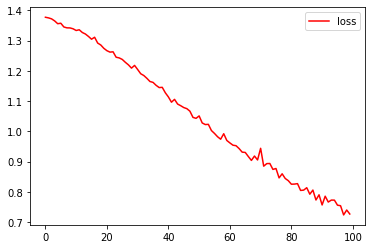

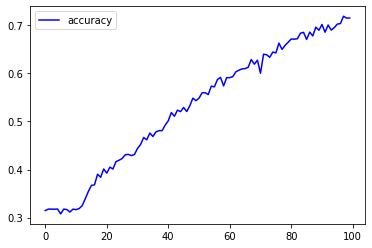

In [67]:
hist1 = pd.DataFrame(history2.history)
print(hist1.head())
plt.figure()
plt.plot(hist1['loss'],c='r')
plt.legend(['loss'])
plt.show()
plt.plot(hist1['accuracy'],c='b')
plt.legend(['accuracy'])
plt.show()

#Word2vec Skip Gram

In [48]:
dict_sg = pd.read_csv('/content/drive/My Drive/InfluenceAnalysis/Word2VecSG/Dictionary.csv')
new_columns = dict_sg.columns.values
new_columns[0] = 'Month'
dict_sg.columns = new_columns
dict_sg = dict_sg.set_index('Month')
dict_sg.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
How,0.002599,0.011375,0.018244,0.016513,0.029465,-0.011883,-0.050042,0.011291,0.054797,-0.003539,-0.015906,-0.008192,-0.019496,0.082753,0.023367,0.048657,0.074064,0.028927,0.006707,-0.043724,-0.005113,-0.040447,0.025700,0.075685,0.012448,0.055289,0.067174,0.010321,-0.015910,-0.017487,0.034962,-0.025325,-0.049324,-0.062962,0.034109,0.000421,-0.004352,-0.056028,0.019769,0.012981,...,-0.035736,-0.018946,-0.023350,0.098050,0.037240,-0.008973,-0.021498,0.014722,0.004106,-0.037209,0.045879,-0.096059,-0.022925,-0.092615,-0.008112,-0.007949,0.013894,-0.000988,0.012163,0.033669,-0.015496,0.004729,-0.002015,-0.012338,0.002887,-0.034622,0.002720,-0.026264,0.015148,-0.010642,-0.036368,-0.087403,-0.071961,0.015542,-0.004862,0.046216,0.038414,0.054556,0.013671,-0.076942
the,0.015219,0.022864,0.007315,0.014844,-0.028158,0.004005,-0.084564,-0.005528,0.062190,0.037539,0.036019,-0.010908,-0.061608,-0.004386,-0.026106,0.023010,0.037532,0.010599,-0.036705,0.001367,-0.009665,0.004549,0.028766,0.012988,-0.007404,0.022243,0.011080,0.018845,-0.013575,0.004885,0.014226,-0.042945,-0.019447,-0.001028,0.004527,0.011694,0.000611,-0.051977,-0.015922,-0.019391,...,-0.008963,-0.001544,-0.073645,-0.025496,0.010718,-0.015272,-0.015379,0.016365,0.000074,0.034648,0.017359,0.008866,0.008774,-0.002568,0.016733,-0.006251,-0.049209,0.011139,0.012030,-0.015266,-0.017574,0.007966,-0.006961,0.044321,0.003088,-0.001483,0.025776,-0.009670,0.018260,-0.009271,0.012716,-0.012115,-0.035725,0.015622,0.007918,-0.025386,-0.000265,0.001812,0.009248,0.129357
fuck,0.032576,0.025921,0.052226,0.009399,-0.072978,0.031695,0.007106,0.075352,-0.027944,-0.020646,0.043572,-0.062599,0.143913,0.099906,0.068498,0.033912,0.133458,0.010761,0.026052,-0.021553,0.042543,-0.041209,0.038700,0.160556,0.054648,-0.016627,0.015080,0.010438,-0.018969,0.116112,-0.116038,-0.086052,-0.041072,0.060364,-0.028284,-0.026181,0.054755,-0.000412,0.030117,0.045204,...,0.004606,0.110839,0.026203,0.086603,0.000501,0.041926,-0.008076,-0.113648,0.073360,-0.001944,-0.059815,-0.106872,0.025439,-0.054140,0.068051,-0.029127,0.014214,0.037835,0.016514,-0.028879,-0.040677,-0.126833,0.060561,0.078043,-0.006681,0.003415,-0.065602,-0.020803,0.096716,-0.010124,-0.111485,0.043148,-0.042187,0.037884,-0.029898,-0.029254,-0.090843,0.064905,0.008968,-0.119923
Who,0.028580,0.058843,-0.036522,0.027822,0.025188,0.092522,-0.047510,-0.031927,-0.003008,-0.061532,0.055694,0.022422,0.075079,0.013422,-0.050637,0.016027,-0.111700,0.012172,-0.017774,0.011942,0.030655,0.057550,0.045100,-0.022369,-0.100495,0.050731,0.096162,0.000687,-0.107679,-0.047068,0.018637,-0.024900,0.031071,0.017804,0.032658,-0.037405,-0.011088,0.088306,0.005139,-0.015358,...,0.033092,-0.001361,-0.077302,-0.070553,0.043367,0.033025,0.026821,-0.059659,-0.010484,-0.007462,0.007849,-0.050845,-0.050734,-0.003016,0.054307,-0.002783,-0.041593,0.043077,-0.010509,0.082084,0.053588,0.047671,0.078427,-0.005967,-0.055654,-0.076124,0.043015,-0.030115,0.024943,0.021888,0.004556,-0.045453,-0.019621,0.055637,0.073808,-0.019205,0.056994,0.063762,-0.000907,-0.069198
heck,0.073465,-0.092161,0.080890,0.141034,-0.092109,0.012384,-0.111921,0.055708,0.102583,-0.015236,0.129521,-0.121101,0.126043,0.013811,0.095917,0.000036,0.089175,-0.076379,-0.088984,0.033365,0.106153,-0.029409,0.086358,0.091033,-0.074703,-0.054149,0.029165,0.039721,-0.195351,0.084884,0.065045,0.056992,0.016791,0.047194,-0.108566,-0.110315,0.082160,-0.104673,0.054390,0.079401,...,0.128566,0.066975,0.086546,0.116478,-0.089568,0.113595,0.096133,-0.073029,0.057982,0.017978,-0.115260,-0.090616,0.047746,0.002221,0.086689,0.003211,-0.084317,0.106603,0.149817,-0.085119,-0.043893,-0.127650,0.

In [73]:
sg_dict = {}
for word,ind in zip(dict_sg.index,range(len(dict_sg))):
    sg_dict[word] = dict_sg.iloc[ind].values

In [74]:
sg_tweetseq= [];

for tweet in tweetslist:
  temp = []
  for word in tweet:
    if word != "x" and isinstance(word , str):
      try:
        temp.append(sg_dict[word])
      except KeyError:
        temp.append([0]*128)
    else:
      temp.append([0]*128)
    
  sg_tweetseq.append(temp)

In [75]:
sg_training_padded = np.array(sg_tweetseq)
labels = list(df_train['Encoding'])
sg_training_labels = np.array(labels)
# testing_padded = np.array(testing_padded)
# testing_labels = np.array(testing_labels)
print(sg_training_padded.shape)

(3613, 63, 128)


In [76]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.Input(shape=(63,128)))
model2.add(tf.keras.layers.LSTM(20))
# model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(4, activation='softmax'))

model2.compile(loss='categorical_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])

In [ ]:
history2 = model2.fit(sg_training_padded,sg_training_labels,epochs=100)

       loss  accuracy
0  1.377859  0.308054
1  1.374957  0.317741
2  1.374820  0.317741
3  1.374731  0.317741
4  1.375485  0.317741


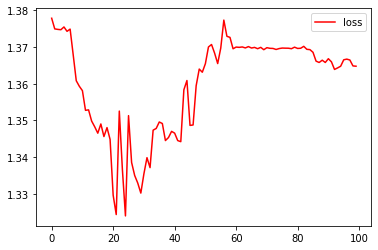

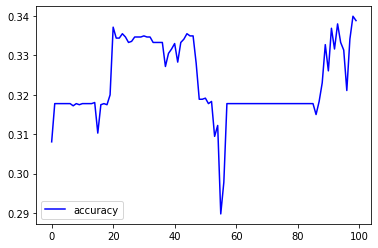

In [78]:
hist2 = pd.DataFrame(history2.history)
print(hist2.head())
plt.figure()
plt.plot(hist2['loss'],c='r')
plt.legend(['loss'])
plt.show()
plt.plot(hist2['accuracy'],c='b')
plt.legend(['accuracy'])
plt.show()

#All test data

In [65]:
df_test = pd.read_csv('/content/drive/My Drive/InfluenceAnalysis/Data/Test/clean_all_test.csv')

In [66]:
df_test.head()

,Unnamed: 0,Tweets,Labels,Category
0,0,At the point today where if someone says somet...,0.319,anger
1,1,IT S GAME DAY T MINUS 14Happy ...,0.144,anger
2,2,This game has pissed me off more than any othe...,0.898,anger
3,3,I have just found out it is Candice and not C...,0.271,anger
4,4,if he cannot come to my Mum a 60th after ...,0.646,anger
